# Backwater curve calculation 

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

This is a Python computer program to solve the backwater curve equation numerically. To simplify the problem, we only consider M1 and M2 curves on mild slopes. 

The backwater curve equation is as the following:
\begin{equation}
  \frac{dH}{dx}=\frac{S-S_f}{1-Fr^2}=F(H) 
\end{equation}

\begin{equation}
  F(H)=\frac{S-C_f \frac{q_w^2}{gH^3}}{1-\frac{q_w^2}{gH^3}} 
\end{equation}  

\begin{equation}
  H(x_0)=H_0 
\end{equation}
where $H(x)$ is the water depth, $x$ is the streamwise coordinate, $S$ is the bottom slope, $S_f$ is the friction slope, $Fr$ is the Froude number, $q_w$ is the specific discharge, and $C_f$ is the friction coefficient. One way to quantify it is to use Chezy coefficient $C_z$:
\begin{equation}
  C_f= \frac{1}{C_z^2}
\end{equation}

<img src="backwater_grid.png" alt="hierarchy" width="400"/>

<h3 align="center">Figure 1. Grid for backwater curve calculation.</h3> 

The following concetps in Python are used:
* function
* Numpy array
* plotting and graphic visulization



In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"


### Required input (SI unit)

In [4]:
#bottom slope
S = 0.0003

#Chezy friction coefficient
Cz = 22.0

Cf = 1/Cz**2

#specific discharge (discharge per unit width)
qw=5.7 

#Initial condition
x0 = 0    #starting x
H0 = 20   #starting water depth

#River length in m
L = 100000.0

#number of grids 
N = 1000



### Calculate parameters at normal flow

In [5]:
#normal flow depth
Hn = (1.0/Cz**2.0*qw**2.0/9.81/S)**(1.0/3.0)

#velocity at normal flow condition
Un = qw/Hn

#Fr number at normal flow condition
Frn = Un/np.sqrt(9.81*Hn)

#bottom shear stress at normal flow condition
taub_n = 1000.0/Cz**2.0*Un**2

print(Hn, Un, Frn, taub_n, Cf)

2.8359900047110065 2.009880144334586 0.3810511776651531 8.346318583864495 0.002066115702479339


### Calculate parameters at critical flow

In [6]:
#critical flow depth
Hc = (qw**2/9.81)**(1.0/3.0)

#critical flow velocity
Uc = qw/Hc

print(Hc, Uc)

1.4905969719522099 3.8239712727544357


### Define F(H) function

In [7]:
def F_H(H,x): # F(H) function
    return -(S-Cf*qw**2/9.81/H**3)/(1-qw**2/9.81/H**3)

### Integrate the backwater curve

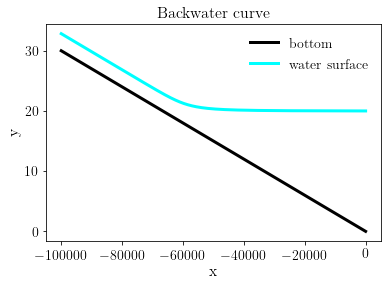

In [13]:
x = np.linspace(x0,L,N)
H = integrate.odeint(F_H,H0,x)
H = H[:, 0]  # convert the returned 2D array to a 1D array

negX = -x  #streamwise direction

Zbottom = x*S

WS=H+x*S

plt.figure(figsize=(6,4))

plt.plot(negX,Zbottom,'k',linewidth=3,label='bottom')
plt.plot(negX,WS,'Aqua',linewidth=3,label='water surface')

plt.xlabel('x (m)',fontsize=16)
plt.ylabel('elevation (m)',fontsize=16)

#set the limit for the x and y axes
#plt.xlim([0,1.0])
#plt.ylim([5,45])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=14)

#show title and set font size
plt.title('Backwater curve',fontsize=16)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper right',fontsize=14,frameon=False)
plt.savefig("backwater_result.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()